<a href="https://colab.research.google.com/github/tbonza/ds5220/blob/master/fully_connected_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Summary

Puttng together a fully connected neural network using tensorflow. This is based on the Deep Learning classes I've been taking from Andrew Ng.

# Dependencies

Try to keep all the dependencies in one place.

In [65]:
!pip install cloudpickle
!pip install dask
!pip install scikit-image

In [0]:
import ast
import io
import os
import zipfile

from dask import bag
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image, ImageDraw
import scipy as sp
from scipy import ndimage
import skimage.transform as skt

# Data 

Loading the data from the [QuickDraw](https://www.kaggle.com/c/quickdraw-doodle-recognition) contest. We also need to convert it, resize it, then put it in a matrix.

In [2]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
def train_hotdog(images, folder_name):
  """ Create a training set for hotdogs """
  Y = [i.split("_")[0] for i in images]
  y_train = []
  x_train = []
  
  for img_pos, image_name in enumerate(images):
    
    fname = folder_name + image_name
    image = ndimage.imread(fname)
    x_i = image[:,:,0].reshape((1,48*72)).T
    
    label = Y[img_pos]
    
    if label == "hotdog":
      y_train.append(1)
    else:
      y_train.append(0)
      
    x_train.append(x_i)
      
  return (x_train, y_train)

In [0]:
image_filenames = os.listdir("gdrive/My Drive/gcolab/png")
folder_name = "gdrive/My Drive/gcolab/png/"

x_train, y_train = train_hotdog(image_filenames, folder_name)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  # Remove the CWD from sys.path while we load stuff.


In [108]:
Y[:10]

['fish',
 'hotdog',
 'fork',
 'hotdog',
 'fish',
 'hotdog',
 'fish',
 'fish',
 'fork',
 'fork']

In [0]:
my_image = images[0]

In [79]:
fname = "gdrive/My Drive/gcolab/png/" + my_image
image = np.array(ndimage.imread(fname, flatten=False))

image = ndimage.imread(fname)
#my_image = sp.misc.imresize(image, size=(64,64)).reshape((1, 64*64*3)).T
#my_image_prediction = predict(my_image, parameters)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  after removing the cwd from sys.path.


In [0]:
a = image[:,:,0].reshape((1,48*72)).T

In [103]:
a.shape

(3456, 1)

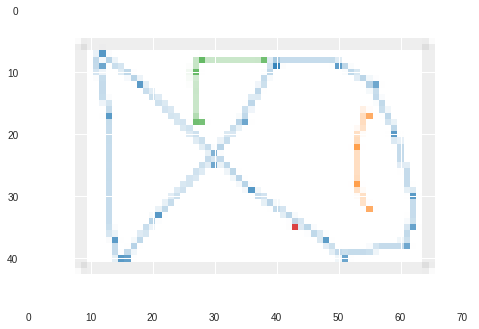

In [81]:
imgplot = plt.imshow(image)

In [0]:
plt.plot(x, y, marker='.')


#num_classes = 340    #340 max 
#imheight, imwidth = 32, 32  
#ims_per_class = 2000  #ma

In [0]:
fpath = "gdrive/My Drive/gcolab/train_simplified.zip"

with zipfile.ZipFile(fpath) as myzip:
  with myzip.open('trombone.csv') as myfile:
    train = pd.read_csv(myfile, usecols=['drawing', 'recognized'], nrows=ims_per_class*5//4)


In [0]:
train = train[train.recognized == True].head(ims_per_class)
imagebag = bag.from_sequence(train.drawing.values).map(draw_it)

In [0]:
trainarray = np.array(imagebag.compute()) 

In [60]:
trainarray.shape

(2000, 32, 32)

In [72]:
train.head()

TypeError: ignored

In [70]:
#my_image = sp.misc.imresize(trainarray, size=(64,64)).reshape((1, 64*64*32)).T

#m = skt.resize(trainarray, output_shape=(64,64))

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [0]:
plt.shape(train)

In [0]:
  
    
    train = train[train.recognized == True].head(ims_per_class)
    imagebag = bag.from_sequence(train.drawing.values).map(draw_it) 
    trainarray = np.array(imagebag.compute())  # PARALLELIZE
    trainarray = np.reshape(trainarray, (ims_per_class, -1))    
    labelarray = np.full((train.shape[0], 1), i)
#my_image = scipy.misc.imresize(image, size=(64,64)).reshape((1, 64*64*3)).T